# Object Oriented Programming 2 - examples and APIs


## Tasks Today:

   

1) <b>Shopping Cart Example</b> <br>
2) <b>Requests and the pokemon API </b> <br>
 

# Goal 
### build a shopping cart program with prices and quantities using objects and a dictionary

In [ ]:
from IPython.display import clear_output as clear
# Create a class called Cart that retains items and has methods to add, remove, and show

class Cart():
    
    def __init__(self):
        self.items = {} #{item : quantity}
        
    #add to items to our cart
    def add_item(self):
        #clear()
        new_item = input("What would you like to add? ")
        quantity = int(input(f"How many {new_item}(s) do you want to add? (insert number)"))
        if new_item not in self.items:
            self.items[new_item] = quantity
        else:
            self.items[new_item] += quantity
        print(f"{quantity} {new_item}(s) has/have been added to your cart!")
        
    #remove items from cart
    def remove_item(self):
        #clear()
        discard = input("What would you like to remove? ")
        quantity = int(input("How many would you like to remove? "))
        try: 
            self.items[discard] -= quantity
            if self.items[discard] <= 0:
                del self.items[discard]
            print(f"{quantity} {discard}(s) has/have been removed!")
        except: 
            print(f"{discard} was not in your cart!")
        self.show()
        
    def show(self):
        print("Your cart has the following items: ")
        for item, quantity in self.items.items():
            print(f"{item} | quantity: {quantity}")
            
            
    # checkout items from your cart
    def checkout(self):
        #clear()
        if not self.items:
            print("Please buy something before checking out! Dont be cheap!")
        else:
            print("Thanks for shopping at Aldi! Do you need any stamps, garbage stickers, or extreme value!")
            self.show()
            
# control flow - run the overall program
class Main:
    def show_instructions():
        print("""
            Welcome to Aldi, we're the best and have great peanut butter cups. Try our strawberry Belle Vue.
            Options:
            [1] Show Current Cart
            [2] Add Item
            [3] Remove
            [4] Checkout
            [5] Show Instructions            
        """)
        
    def run():
        Main.show_instructions()
        my_cart = Cart()
        
        while True:
            choice = input("What would you like to do? ")
            if choice == '1':
                if my_cart.items == {}:
                    print("Your cart is empty, lets get shoppin!")
                else:
                    my_cart.show()
                    
            elif choice == "2":
                my_cart.add_item()
                
            elif choice == "3":
                if my_cart.items == {}:
                    print("Your cart is empty. Please add something before trying to remove! Please.")
                else:
                    my_cart.remove_item()
                    
            elif choice == "4":
                my_cart.checkout()
                break
                
            elif choice == "5":
                Main.show_instructions()
            
            else:
                print("Invalid input, please try again!")
        
        
        
            
        



In [ ]:
Main.run()

# working with APis

<p> What exactly is an API? <br> <br>
API is the acronym for Application Programming Interface, which is a software intermediary that allows two applications to talk to each other. Each time you use an app like Facebook, send an instant message, or check the weather on your phone, you're using an API. </p>

### The Poke API  allows you to retreive a pokemon's information from PokeAPI https://pokeapi.co/



In [8]:
# making an API call
import requests

r = requests.get('https://pokeapi.co/api/v2/pokemon/charmander')
print(r)

if r.status_code == 200:
    data = r.json()
print(data.keys())


<Response [200]>
dict_keys(['abilities', 'base_experience', 'forms', 'game_indices', 'height', 'held_items', 'id', 'is_default', 'location_area_encounters', 'moves', 'name', 'order', 'past_types', 'species', 'sprites', 'stats', 'types', 'weight'])


In [6]:
#print(data)


### Display a Pokemon's name, weight, abilities, and types

In [9]:
# get the name
name = data['name']
print(name)

charmander


In [10]:
# get types
types = [type_['type']['name'] for type_ in data['types']]

print(types)



['fire']


In [11]:
# get weight
weight = data['weight']
print(weight)

85


In [12]:
# get abilities
abilities = [ability['ability']['name'] for ability in data['abilities']]
print(abilities)

['blaze', 'solar-power']


In [13]:
# Create a structure for a single pokemon
charmander = {
    'name' : name,
    'abilities': abilities,
    'weight': weight,
    'types': types   
}

print(charmander)

{'name': 'charmander', 'abilities': ['blaze', 'solar-power'], 'weight': 85, 'types': ['fire']}


#### Create a function to Pull in your own Pokemon's data 

In [14]:
def poke_api_call(pokemon):
    req = requests.get(f"https://pokeapi.co/api/v2/pokemon/{pokemon}")
    if req.status_code == 200:
        data = req.json()
        
        name = data['name']
        types = [type_['type']['name'] for type_ in data['types']]
        abilities = [ability['ability']['name'] for ability in data['abilities']]
        weight = data['weight']
        
        poke = {
            "name": name,
            "types": types,
            "abilities": abilities,
            'weight': weight
        }
        
        return poke
    
poke_api_call('squirtle')


{'name': 'squirtle',
 'types': ['water'],
 'abilities': ['torrent', 'rain-dish'],
 'weight': 90}

Choose your pokemon

In [15]:
from random import randint
# Random number generated for each pokemon id
random_team = [randint(1,898) for i in range(6)]

your_team = ['electabuzz', 'haunter','tyranitar','blaziken','marowak','dragonair']
print(random_team)

[478, 446, 401, 818, 366, 215]


#### Use your function to create a dictionary of your favorite 6 pokemon

In [16]:
# Place all 6 of your pokemon on the object below, each pokemon should have at least as much info as Pikachu did.
party = ['heracross', 'vaporeon', 'flygon', 'charizard', 'pidgeot', 'crobat']
my_six_pokemon = {}
for pokemon in party:
    # we set the name as a key
    poke_stats = poke_api_call(pokemon)
    my_six_pokemon[poke_stats['name'].title()] = poke_stats
# We are returning the keys with the values from the poke dict    
my_six_pokemon



{'Heracross': {'name': 'heracross',
  'types': ['bug', 'fighting'],
  'abilities': ['swarm', 'guts', 'moxie'],
  'weight': 540},
 'Vaporeon': {'name': 'vaporeon',
  'types': ['water'],
  'abilities': ['water-absorb', 'hydration'],
  'weight': 290},
 'Flygon': {'name': 'flygon',
  'types': ['ground', 'dragon'],
  'abilities': ['levitate'],
  'weight': 820},
 'Charizard': {'name': 'charizard',
  'types': ['fire', 'flying'],
  'abilities': ['blaze', 'solar-power'],
  'weight': 905},
 'Pidgeot': {'name': 'pidgeot',
  'types': ['normal', 'flying'],
  'abilities': ['keen-eye', 'tangled-feet', 'big-pecks'],
  'weight': 395},
 'Crobat': {'name': 'crobat',
  'types': ['poison', 'flying'],
  'abilities': ['inner-focus', 'infiltrator'],
  'weight': 750}}

## Lets create a class called 'Pokemon' and create our pokemon as instances

In [17]:
# class Pokemon1:
#     def __init__(self, name):
#         self.name = name
        
#     def __repr__(self):
#         return f"You caught a {self.name}!"
        
# bulbasaur = Pokemon1('bulbasaur')
# print(bulbasaur)
# print(bulbasaur.name)

In [18]:
class Pokemon():
    def __init__(self, name):
        self.name = name
        self.types = []
        self.abilities = []
        self.weight = None
        self.poke_api_call()
        
# charmander = Pokemon('charmander') this goes into the class function and goes through the first method, then through the next method and so on        
    def poke_api_call(self):
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name.lower()}")
        if r.status_code == 200:
            pokemon = r.json()
        else:
            print(f"Please check pokemon name spelling and try again: {r.status_code}")
            return
        self.name = pokemon['name']
        self.types = [type_['type']['name'] for type_ in pokemon['types']]
        self.abilities = [ability['ability']['name'] for ability in pokemon['abilities']]
        self.weight = pokemon['weight']
        print(f"{self.name}'s data has been updated!")
        
    def __repr__(self):
        return f"You caught a {self.name}!"
            
turtwig = Pokemon('turtwig')
print(turtwig)

turtwig's data has been updated!
You caught a turtwig!


In [19]:
print(turtwig)
print(turtwig.name)
print(turtwig.types)
print(turtwig.abilities)
print(turtwig.weight)


You caught a turtwig!
turtwig
['grass']
['overgrow', 'shell-armor']
102


### Let's Catch some Pokemon

In [20]:
charmander = Pokemon('charmander')
print(charmander.__dict__)
print(charmander)
print(charmander.weight)

charmander's data has been updated!
{'name': 'charmander', 'types': ['fire'], 'abilities': ['blaze', 'solar-power'], 'weight': 85}
You caught a charmander!
85


In [21]:
party = ['heracross', 'vaporeon', 'flygon', 'charizard', 'pidgeot', 'crobat']
pokedex = {}
for name in party:
    new = Pokemon(name)
    pokedex[new.name.title()] = new.__dict__
print(pokedex)

heracross's data has been updated!
vaporeon's data has been updated!
flygon's data has been updated!
charizard's data has been updated!
pidgeot's data has been updated!
crobat's data has been updated!
{'Heracross': {'name': 'heracross', 'types': ['bug', 'fighting'], 'abilities': ['swarm', 'guts', 'moxie'], 'weight': 540}, 'Vaporeon': {'name': 'vaporeon', 'types': ['water'], 'abilities': ['water-absorb', 'hydration'], 'weight': 290}, 'Flygon': {'name': 'flygon', 'types': ['ground', 'dragon'], 'abilities': ['levitate'], 'weight': 820}, 'Charizard': {'name': 'charizard', 'types': ['fire', 'flying'], 'abilities': ['blaze', 'solar-power'], 'weight': 905}, 'Pidgeot': {'name': 'pidgeot', 'types': ['normal', 'flying'], 'abilities': ['keen-eye', 'tangled-feet', 'big-pecks'], 'weight': 395}, 'Crobat': {'name': 'crobat', 'types': ['poison', 'flying'], 'abilities': ['inner-focus', 'infiltrator'], 'weight': 750}}


## Exercise 1:

### Create a Method prints an image of your pokemon

<p>HINT: You may need another attribute as well to store your image url within. </p>

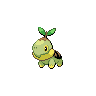

In [22]:
# Display an image in Jupyter notebook
from IPython.display import Image

display(Image( 'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/387.png', width = 100))


In [23]:
# recreate your pokemon class here
class Pokemon:
    def __init__(self, name):
        self.name = name
        self.types = []
        self.abilities = []
        self.weight = None
        # new image attribute
        self.image = None
        self.poke_api_call()
        
    def poke_api_call(self):
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name.lower()}")
        if r.status_code == 200:
            pokemon = r.json()
        else:
            print(f"Please check the spelling of your pokemon's name and try again!: {r.status_code}")
            return
        
        self.name = pokemon['name']
        self.types = [type_['type']['name'] for type_ in pokemon['types']]
        self.abilities = [ability['ability']['name'] for ability in pokemon['abilities']]
        self.weight = pokemon['weight']
        #new image details. adding image to attribute
        self.image = pokemon['sprites']['other']['home']['front_shiny']
        print(f"{self.name}'s data has been updated!")
    
    #display our image with a method
    def display(self):
        display(Image(url = self.image))
        
    #repr gives us string representation of our object
    def __repr__(self):
        return f"You caught a {self.name}!"
            
        
    

In [24]:
turtwig = Pokemon('turtwig')
turtwig.display()

turtwig's data has been updated!


In [25]:
# Calling our new method
heracross = Pokemon('heracross')
heracross.display()

heracross's data has been updated!


## Exercise 2:

### Create a Method that evolves your Pokemon
If your pokemon can't evolve any further print a message that says "\<name of pokemon> can't evolve."

In [26]:
from time import sleep

class Evolver:
    def evolve(self):
        #Api call for pokemon species
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon-species/{self.name}/")
        if r.status_code == 200:
            pokemon_species = r.json()
        else:
            print(f"Ran into an issue, please check your pokemon's name: {r.status_code}")
            return
        
        r = requests.get(pokemon_species['evolution_chain']['url'])
        if r.status_code == 200:
            ev_chain = r.json()
            ev_chain = ev_chain['chain']
        else:
            print(f"Ran into an issue, please check your pokemon's name: {r.status_code}")
            return
        
        base_name = ev_chain['species']['name']
        evolution = ev_chain['evolves_to'][0]
        evolution_name = evolution['species']['name']
        
        #Evolution 1
        if base_name == self.name:
            pass
        # Evolution 2
        elif evolution_name == self.name:
            evolution_name = evolution['evolves_to'][0]['species']['name']
        #Attempting another evolution after the final
        else: 
            print(f"You cannot evolve your {self.name} any further...")
            return
        
        print('..........')
        sleep(1)
        print(f"Your {self.name} is evolving?!?!?!?!")
        self.display()
        sleep(1)
        print('..........')
        print(f"Congratulations!! Your {self.name} has evolved to........")
        self.name = evolution_name
        self.poke_api_call() 
        print(f"{self.name.title()}!!!!")
        self.display()
            
        
        


In [27]:
## Evolver class should inherit pokemon class
from time import sleep
#display images for evolved pokemon
from 

SyntaxError: invalid syntax (719324732.py, line 4)

Now let's evolve a few

In [ ]:
import requests
# recreate your pokemon class here
class Pokemon:
    def __init__(self, name):
        self.name = name
        self.types = []
        self.abilities = []
        self.weight = None
        # new image attribute
        self.image = None
        self.poke_api_call()
        
    def poke_api_call(self):
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name.lower()}")
        if r.status_code == 200:
            pokemon = r.json()
        else:
            print(f"Please check the spelling of your pokemon's name and try again!: {r.status_code}")
            return
        
        self.name = pokemon['name']
        self.types = [type_['type']['name'] for type_ in pokemon['types']]
        self.abilities = [ability['ability']['name'] for ability in pokemon['abilities']]
        self.weight = pokemon['weight']
        #new image details. adding image to attribute
        self.image = pokemon['sprites']['front_shiny']
#         print(f"{self.name}'s data has been updated!")
    
    #display our image with a method
    def display(self):
        display(Image(url = self.image))
        
    #repr gives us string representation of our object
    def __repr__(self):
        return f"You caught a {self.name}!"
            
        
    

In [28]:
## Evolver class should inherit pokemon class
from time import sleep
# Display an image in Jupyter notebook
from IPython.display import Image

class Evolver(Pokemon):
    def __init__(self, name):       
        super().__init__(name)
        
    def evolve(self):
    #Api call for pokemon species
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon-species/{self.name.lower()}/")
        if r.status_code == 200:
            pokemon_species = r.json() #still <-- data
        else:
            print(f"Ran into an issue, please check your pokemon's name: {r.status_code}")
            return

        r = requests.get(pokemon_species['evolution_chain']['url'])
        if r.status_code == 200:
            ev_chain = r.json()
            ev_chain = ev_chain['chain']
        else:
            print(f"Ran into an issue, please check your pokemon's name: {r.status_code}")
            return

        base_name = ev_chain['species']['name']
        evolution = ev_chain['evolves_to'][0]
        evolution_name = evolution['species']['name']

        #Evolution 1
        if base_name == self.name:
            pass
        # Evolution 2
        elif evolution_name == self.name:
            evolution_name = evolution['evolves_to'][0]['species']['name']
        #Attempting another evolution after the final
        else: 
            print(f"You cannot evolve your {self.name} any further...")
            return

        print('..........')
        sleep(1)
        print(f"Your {self.name} is evolving?!?!?!?!")
        self.display()
        sleep(1)
        print('..........')
        print(f"Congratulations!! Your {self.name} has evolved to........")
        self.name = evolution_name
        self.poke_api_call() 
        print(f"{self.name.title()}!!!!")
        self.display()

In [29]:
piplup = Evolver('piplup')

piplup's data has been updated!


In [30]:
piplup.evolve()

..........
Your piplup is evolving?!?!?!?!


..........
Congratulations!! Your piplup has evolved to........
prinplup's data has been updated!
Prinplup!!!!


In [31]:
turtwig = Evolver('turtwig')

turtwig's data has been updated!


In [32]:
turtwig.evolve()

..........
Your turtwig is evolving?!?!?!?!


..........
Congratulations!! Your turtwig has evolved to........
grotle's data has been updated!
Grotle!!!!


In [33]:
print(charmander.name)
print(charmander.__dict__)

charmander
{'name': 'charmander', 'types': ['fire'], 'abilities': ['blaze', 'solar-power'], 'weight': 85}


In [34]:
charmander.display()

AttributeError: 'Pokemon' object has no attribute 'display'

In [ ]:
charmander.evolve()

In [ ]:
# charmander = Pokemon('charmander')
# charmander.evolve()

In [ ]:
from time import sleep

class Evolver:
    def evolve(self):
        #Api call for pokemon species
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon-species/{self.name}/")
        if r.status_code == 200:
            pokemon_species = r.json()
        else:
            print(f"Ran into an issue, please check your pokemon's name: {r.status_code}")
            return
        
        r = requests.get(pokemon_species['evolution_chain']['url'])
        if r.status_code == 200:
            ev_chain = r.json()
            ev_chain = ev_chain['chain']
        else:
            print(f"Ran into an issue, please check your pokemon's name: {r.status_code}")
            return
        
        base_name = ev_chain['species']['name']
        evolution = ev_chain['evolves_to'][0]
        evolution_name = evolution['species']['name']
        
        #Evolution 1
        if base_name == self.name:
            pass
        # Evolution 2
        elif evolution_name == self.name:
            evolution_name = evolution['evolves_to'][0]['species']['name']
        #Attempting another evolution after the final
        else: 
            print(f"You cannot evolve your {self.name} any further...")
            return
        
        print('..........')
        sleep(1)
        print(f"Your {self.name} is evolving?!?!?!?!")
        self.display()
        sleep(1)
        print('..........')
        print(f"Congratulations!! Your {self.name} has evolved to........")
        self.name = evolution_name
        self.poke_api_call() 
        print(f"{self.name.title()}!!!!")
        self.display()
            
        
        


In [ ]:
charmander.evolve()

#  Final Exercise: <br> <br>Create a Move_Tutor Class that in herits from the Pokemon parent class.

<p><b>This class should have a list attribute that holds pokemon moves which should be populated with an api call to the PokeApi moves section. Finally create a class method that teaches your pokemon up to 4 moves.</b></p> 



In [6]:
import requests

class Pokemon:
    def __init__(self, name):
        self.name = name

    def speak(self):
        print(f"{self.name} says 'Turtwig!'")

class MoveTutor(Pokemon):
    def __init__(self, name):
        super().__init__(name)
        self.moves = []

    def fetch_moves(self):
        response = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name}")
        if response.status_code == 200:
            data = response.json()
            moves_data = data["moves"]
            self.moves = [move["move"]["name"] for move in moves_data]

    @classmethod
    def teach_moves(cls, pokemon, moves):
        if isinstance(pokemon, MoveTutor):
            pokemon.moves = moves[:4]
            print(f"{pokemon.name} has learned the following moves: {pokemon.moves}")
        else:
            print("Invalid Pokemon for move teaching.")

# Example usage
turtwig = MoveTutor("turtwig")
turtwig.fetch_moves()
turtwig.speak()
MoveTutor.teach_moves(turtwig, ["razor-leaf", "tackle", "withdraw", "synthesis"])


turtwig says 'Turtwig!'
turtwig has learned the following moves: ['razor-leaf', 'tackle', 'withdraw', 'synthesis']


In [7]:
# Example usage
turtwig = MoveTutor("turtwig")
turtwig.fetch_moves()
turtwig.speak()
MoveTutor.teach_moves(turtwig, ["razor-leaf", "tackle", "withdraw", "synthesis"])

turtwig says 'Turtwig!'
turtwig has learned the following moves: ['razor-leaf', 'tackle', 'withdraw', 'synthesis']
